In [1]:
import json 
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
from glob import glob 
os.chdir('../')

def load_df(log_dir):
    with open(log_dir, 'r') as f: 
        data = f.readlines()
    df = pd.DataFrame(list(pd.Series(data).map(eval).values))    
    return df 

def load_log_data(class_name, version, result_dir,method):

    df = pd.DataFrame()
    for i,v in enumerate(version):
        log_dir = os.path.join(result_dir,class_name,method,v,'log.txt')
        
        temp_df = load_df(log_dir)
        temp_df['hue'] = v 
        
        df = pd.concat([df,temp_df])
    
    return df 

def plot_log(data,class_name, metrics:list, figsize:tuple = (10,7)):
    
    fig, axes = plt.subplots(len(metrics),1,figsize=figsize)
    
    for ax, metric in zip(axes, metrics):
        sns.lineplot(
            x = 'epoch',
            y = metric,
            data = data,
            hue = data['hue'],
            ax = ax 
        )
        
    fig.suptitle(class_name)
    plt.show()
    
def read_txt(log_dir):
    with open(log_dir, 'r') as f: 
        data = f.readlines()    
    df = pd.DataFrame([eval(d) for d in data]) 
    return df 

In [12]:
version = ['noisedad_nn5-identity-sampling_ratio_0.1-anomaly_ratio_0.*-n_query_0',
           'noisedad-lof-sampling_ratio_0.1-anomaly_ratio_0.*-n_query_0']
result_dir = './results/MVTecLoco/'
method = 'PatchCore'

log_dirs = np.concatenate([glob(os.path.join(result_dir,method,'*',v,'seed_0','log.txt')) for v in version])
df = pd.DataFrame()

for log_dir in log_dirs:
    auroc_list = {}
    class_name = log_dir.split('/')[4]
    
    data = load_df(log_dir)
    auroc = pd.DataFrame(data['test_metrics'][0]).query('index == "auroc"').values[0]
    data = pd.DataFrame(data['test_metrics'][0]).iloc[3,:].reset_index()
    data['structural_anomalies'] = data['loco_auroc'].apply(lambda x : x['structural_anomalies'])
    data['logical_anomalies'] = data['loco_auroc'].apply(lambda x : x['logical_anomalies'])
    data.drop(columns = 'loco_auroc',inplace=True)
    temp_df = data 
    
    temp_df['class'] = class_name 
    temp_df['anomaly_ratio'] = float(log_dir.split('/')[-3].split('-')[-2].split('_')[-1])
    temp_df['sampling_method'] = log_dir.split('/')[-3].split('-')[1]
    
    df = pd.concat([df,temp_df])
    
df = df.melt(['index','class','anomaly_ratio','sampling_method'])

# sampling method identity,랑 lof만 남기기 
df = df[(df['sampling_method'] =='identity') | (df['sampling_method'] =='lof')].reset_index(drop=True)

# 이름 바꾸기 
df.loc[df['sampling_method']=='identity','sampling_method'] = 'PatchCore'
df.loc[df['sampling_method']=='lof','sampling_method'] = 'SoftPatch'

plot_df = df.groupby(['variable','anomaly_ratio','sampling_method','index','class'])['value'].mean().reset_index()
# plot_df = plot_df[plot_df['index'] == 'img_level'].reset_index(drop=True)

result = plot_df.pivot_table(index=['class','sampling_method','index'],columns=['variable','anomaly_ratio'],values='value')
result    

variable                                      logical_anomalies            \
anomaly_ratio                                              0.00      0.05   
class               sampling_method index                                   
breakfast_box       PatchCore       img_level          0.840875  0.851056   
                                    pix_level          0.899787  0.881489   
                    SoftPatch       img_level          0.859917  0.859540   
                                    pix_level          0.902284  0.902926   
juice_bottle        PatchCore       img_level          0.891673  0.893515   
                                    pix_level          0.909888  0.909107   
                    SoftPatch       img_level          0.893106  0.904255   
                                    pix_level          0.921286  0.923303   
pushpins            PatchCore       img_level          0.657479  0.632764   
                                    pix_level          0.572364  0.512823   
                    SoftPatch       img_level          0.675466  0.662655   
                                    pix_level          0.533640  0.516235   
screw_bag           PatchCore       img_level          0.628671  0.594860   
                                    pix_level          0.733940  0.733482   
                    SoftPatch       img_level          0.610656  0.613559   
                                    pix_level          0.739018  0.737754   
splicing_connectors PatchCore       img_level          0.758078  0.745769   
                                    pix_level          0.650303  0.651991   
                    SoftPatch       img_level          0.747426  0.742810   
                                    pix_level          0.658089  0.658442   

variable                                                                     \
anomaly_ratio                                      0.10      0.15      0.20   
class               sampling_method index                                     
breakfast_box       PatchCore       img_level  0.787707  0.737745  0.739253   
                                    pix_level  0.867113  0.845005  0.841262   
                    SoftPatch       img_level  0.846531  0.826735  0.785256   
                                    pix_level  0.902286  0.902619  0.901062   
juice_bottle        PatchCore       img_level  0.890957  0.886047  0.887582   
                                    pix_level  0.912848  0.906739  0.906642   
                    SoftPatch       img_level  0.898936  0.895765  0.899345   
                                    pix_level  0.925662  0.919974  0.917237   
pushpins            PatchCore       img_level  0.603649  0.595756  0.581910   
                                    pix_level  0.506518  0.487502  0.470150   
                    SoftPatch       img_level  0.630823  0.605978  0.633411   
                                    pix_level  0.515953  0.483491  0.464801   
screw_bag           PatchCore       img_level  0.622609  0.575649  0.585297   
                                    pix_level  0.732572  0.732515  0.730801   
                    SoftPatch       img_level  0.574710  0.601093  0.587432   
                                    pix_level  0.737712  0.737171  0.737117   
splicing_connectors PatchCore       img_level  0.750858  0.744585  0.735235   
                                    pix_level  0.644299  0.632419  0.633701   
                    SoftPatch       img_level  0.726121  0.725885  0.740324   
                                    pix_level  0.655023  0.652027  0.640361   

variable                                      structural_anomalies            \
anomaly_ratio                                                 0.00      0.05   
class               sampling_method index                                      
breakfast_box       PatchCore       img_level             0.804498  0.777586   
                                    pix_level             0.935337  0.929140   
          

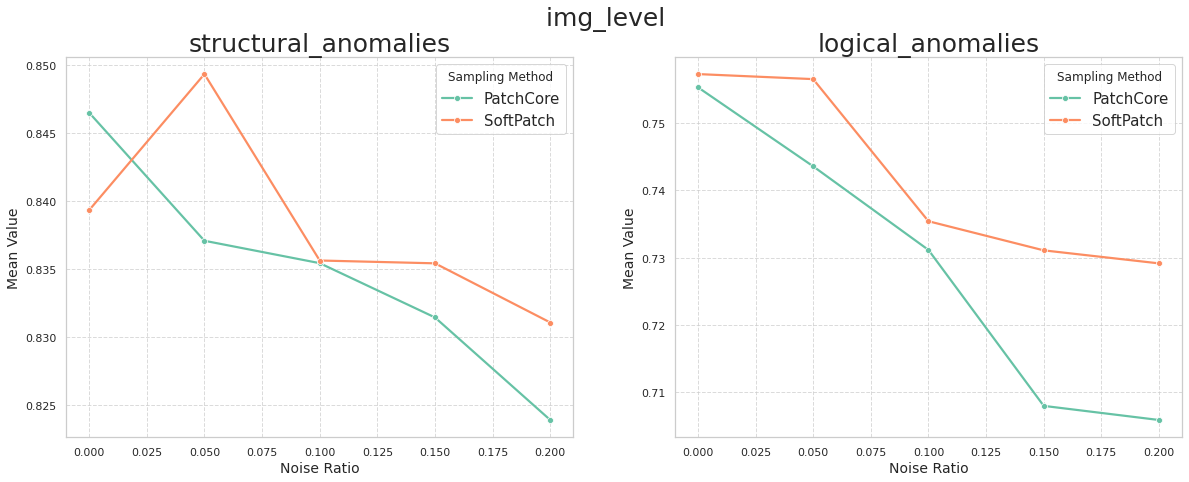

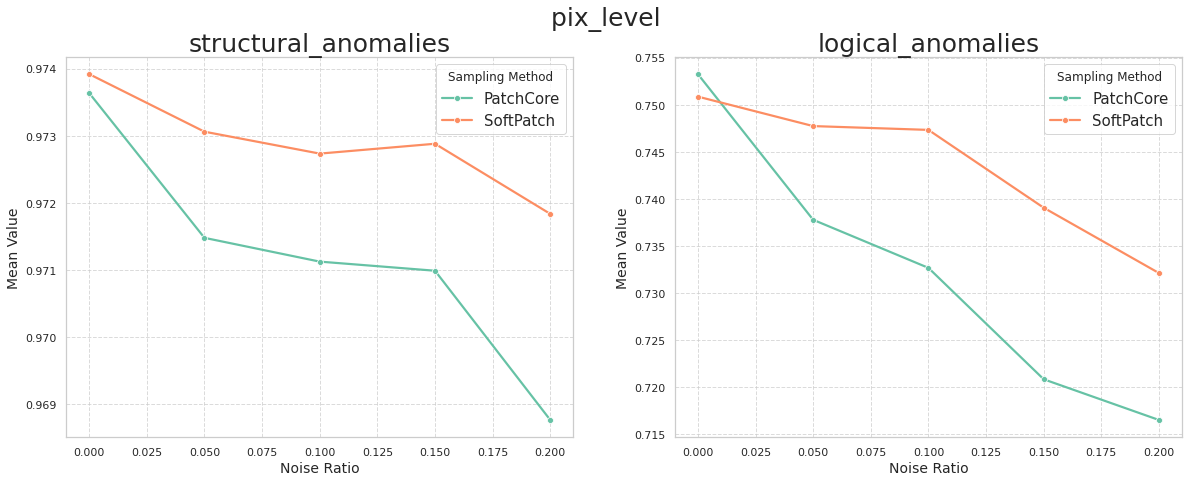

In [13]:
for level in ['img_level','pix_level']:
    plot_df = df.groupby(['variable','sampling_method','anomaly_ratio','index'])['value'].mean().reset_index()
    plot_df = plot_df[plot_df['index'] == level].reset_index(drop=True)

    sns.set(style="whitegrid")  # Set the background style

    fig, axes = plt.subplots(1, 2, figsize=(20, 7))


    for i, a_type in enumerate(['structural_anomalies','logical_anomalies']):
        sns.lineplot(
            x='anomaly_ratio',
            y='value',
            hue='sampling_method',
            data=plot_df[plot_df['variable'] == a_type].reset_index(drop=True),
            ax=axes[i],
            linewidth=2.2,
            markers=True,  # Show markers at data points
            marker='o',    # Marker style
            palette='Set2',  # Color palette
            errorbar=None  # Disable confidence intervals
        )
        
        axes[i].legend(fontsize=15, title='Sampling Method')
        axes[i].set_title(f"{a_type}", size=25)
        axes[i].set_xlabel("Noise Ratio", size=14)
        axes[i].set_ylabel("Mean Value", size=14)
        axes[i].grid(True, linestyle='--', alpha=0.7)

    fig.suptitle(f' {level} ', fontsize=25)
    plt.show()


# class 별로 

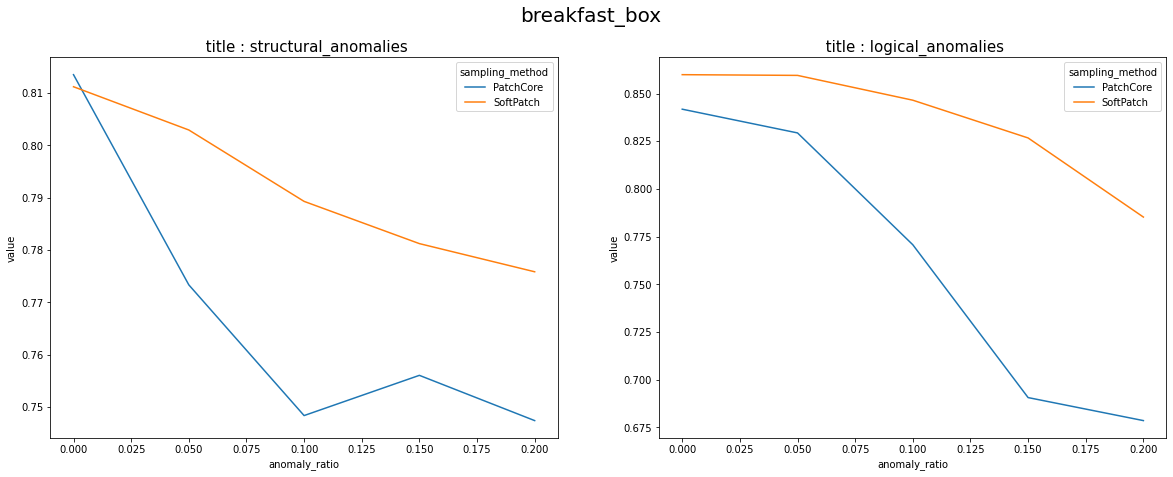

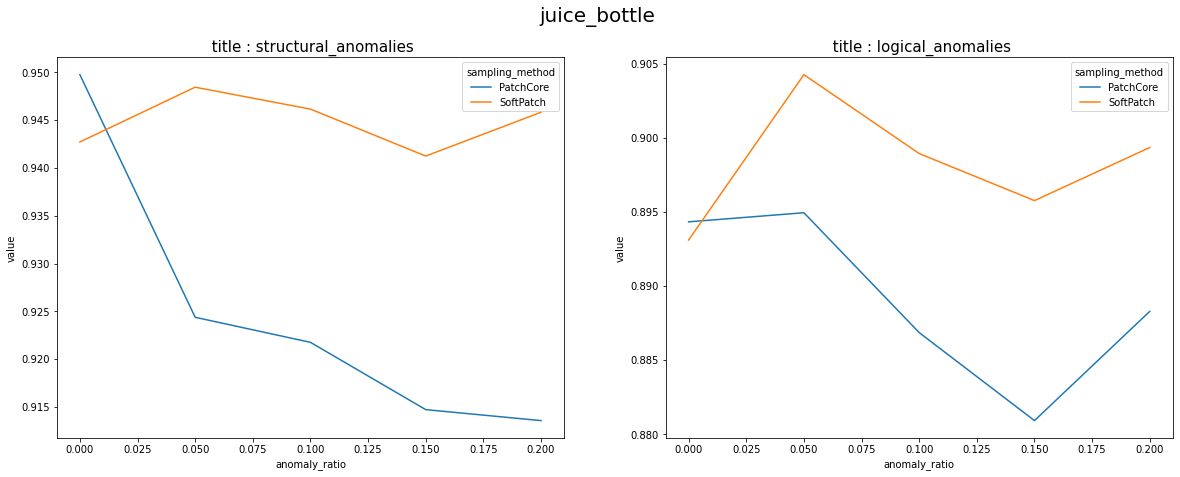

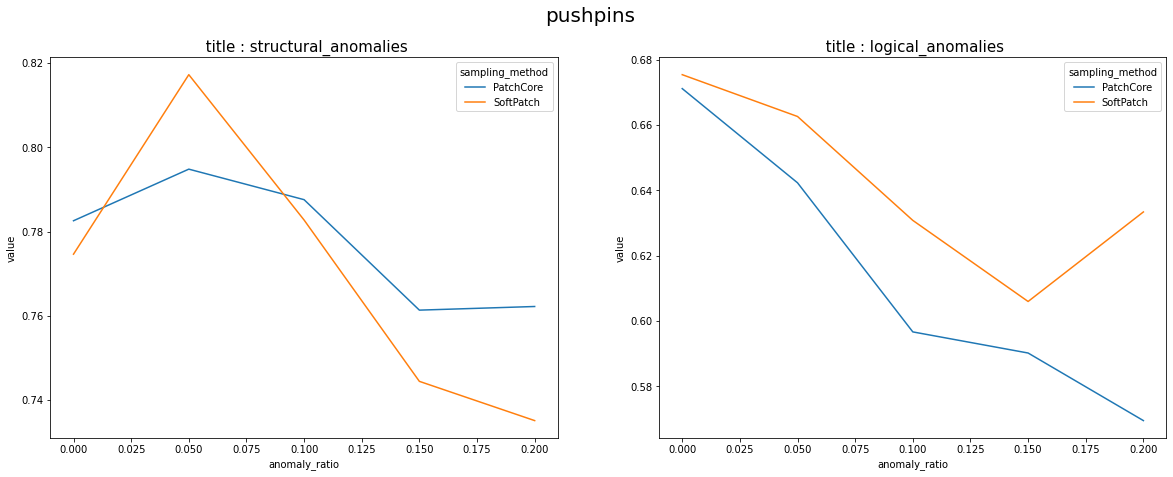

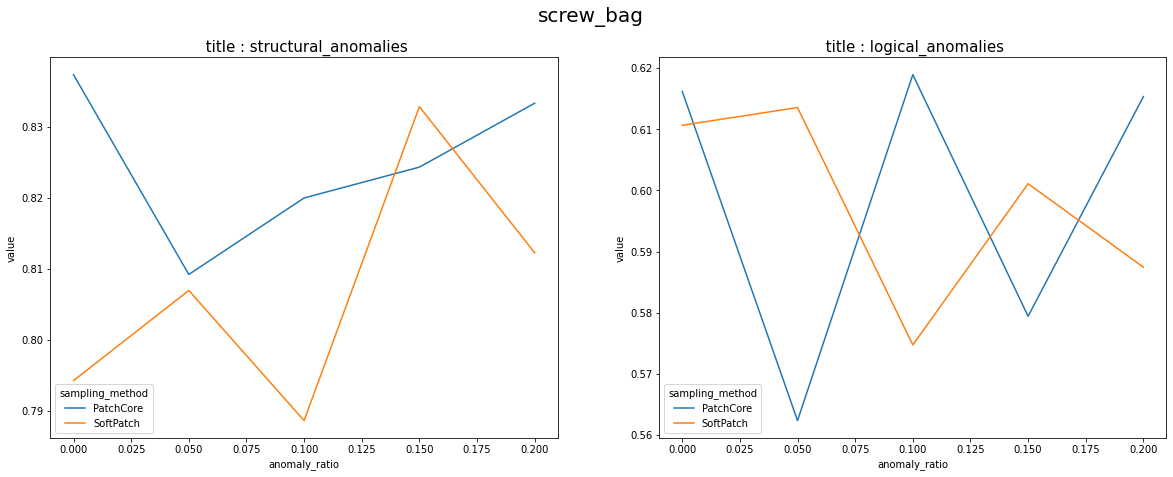

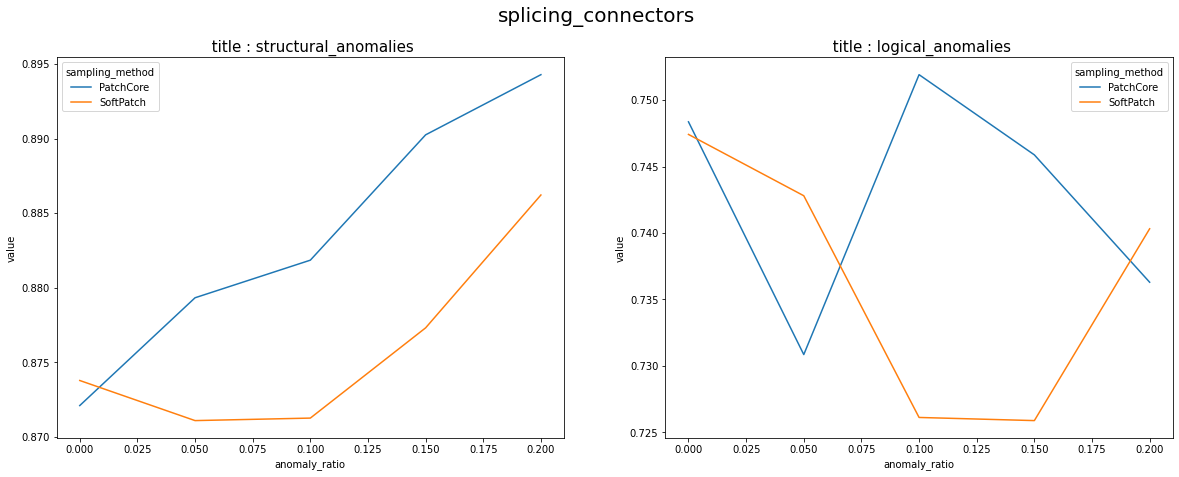

In [7]:
plot_df = df.groupby(['variable','sampling_method','anomaly_ratio','index','class'])['value'].mean().reset_index()
plot_df = plot_df[plot_df['index'] == 'img_level'].reset_index(drop=True)
for class_name in plot_df['class'].unique():
    fig,axes = plt.subplots(1,2, figsize=(20,7))

    for i, a_type in enumerate(['structural_anomalies','logical_anomalies']):
        sns.lineplot(
            x = 'anomaly_ratio',
            y = 'value',
            hue = 'sampling_method',
            data = plot_df[(plot_df['variable'] == a_type) & (plot_df['class']==class_name)],
            ax = axes[i]
        )   
        
        axes[i].set_title(f" title : {a_type}",size=15)
    fig.suptitle(class_name,size=20)
    
    plt.show()


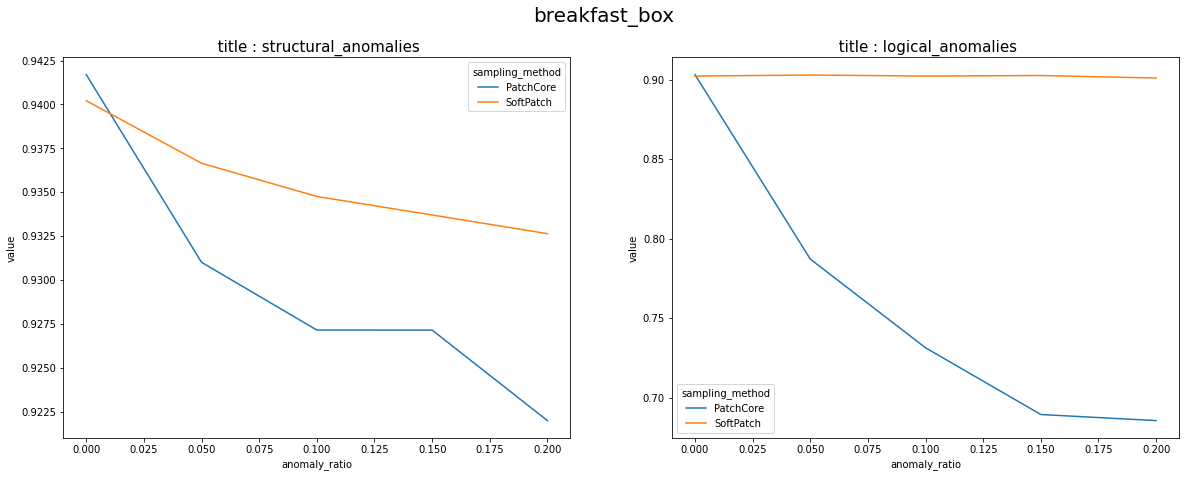

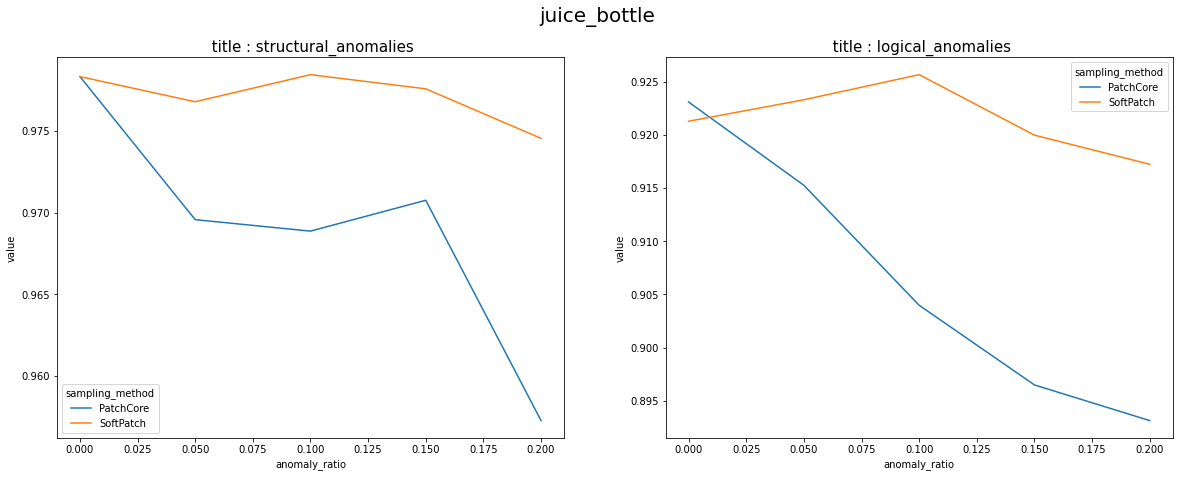

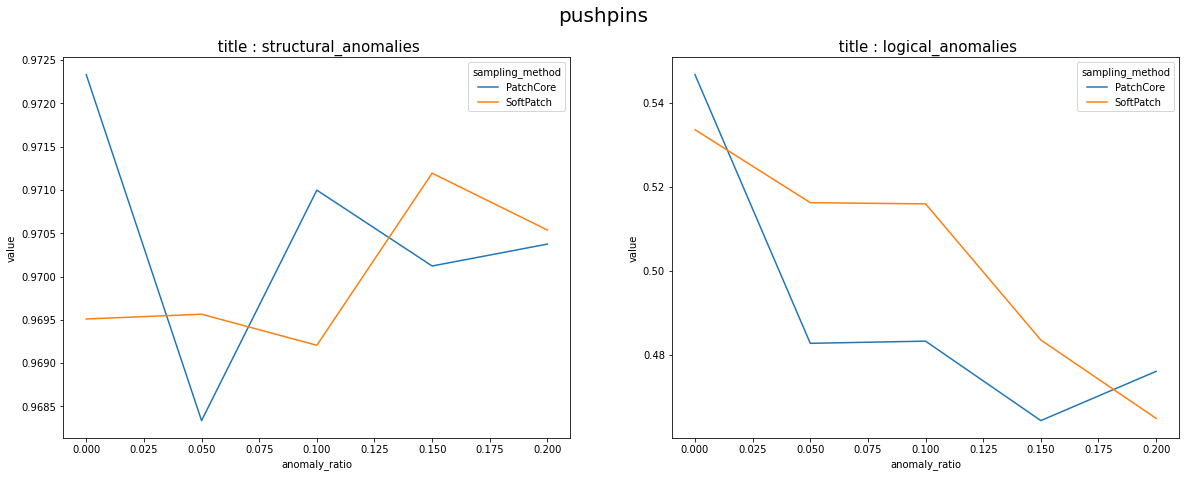

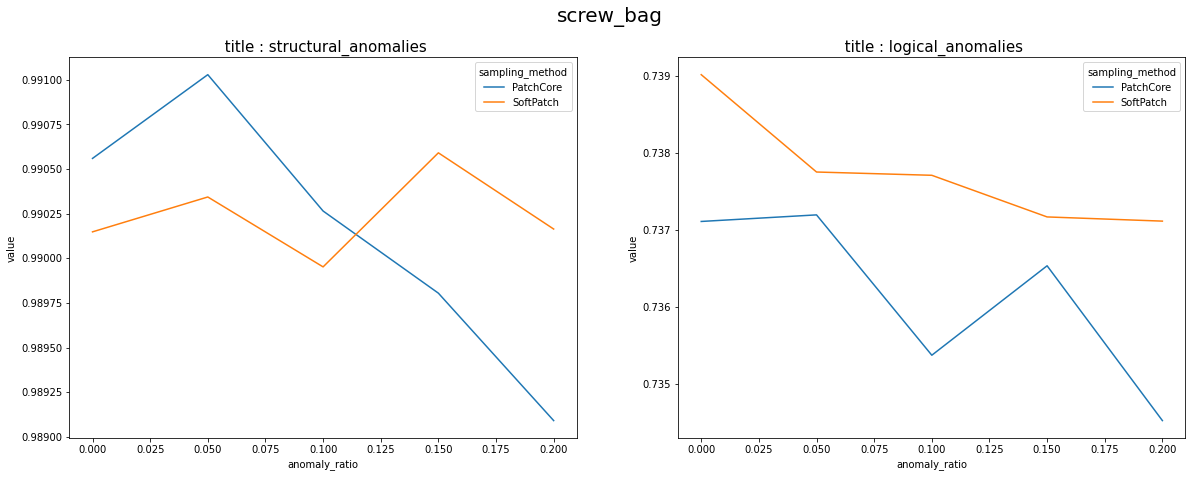

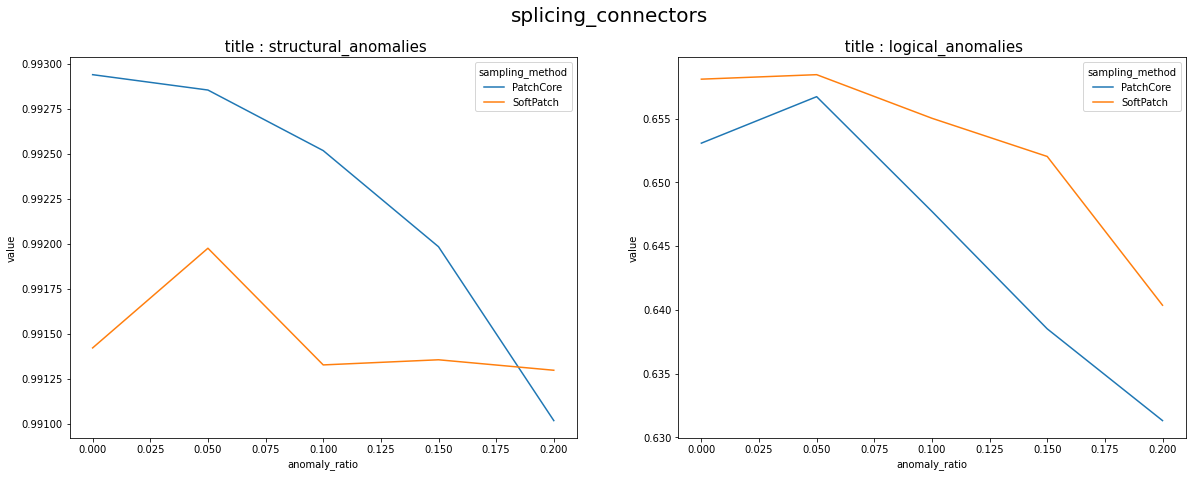

In [8]:
plot_df = df.groupby(['variable','sampling_method','anomaly_ratio','index','class'])['value'].mean().reset_index()
plot_df = plot_df[plot_df['index'] == 'pix_level'].reset_index(drop=True)
for class_name in plot_df['class'].unique():
    fig,axes = plt.subplots(1,2, figsize=(20,7))

    for i, a_type in enumerate(['structural_anomalies','logical_anomalies']):
        sns.lineplot(
            x = 'anomaly_ratio',
            y = 'value',
            hue = 'sampling_method',
            data = plot_df[(plot_df['variable'] == a_type) & (plot_df['class']==class_name)],
            ax = axes[i]
        )   
        
        axes[i].set_title(f" title : {a_type}",size=15)
    fig.suptitle(class_name,size=20)
    
    plt.show()


# Difference 

In [16]:
plot_df = df.groupby(['variable','sampling_method','anomaly_ratio','index','class'])['value'].mean().reset_index()

In [17]:
pivot_df = plot_df.pivot_table(index=['sampling_method','index'],columns=['class','anomaly_ratio'],values='value')
pivot_df = pivot_df.loc['PatchCore'].values - pivot_df.loc['SoftPatch']

img_pivot = pivot_df.loc['img_level'].reset_index()
img_pivot['index']= 'img_level'
img_pivot.columns = ['class','anomaly_ratio','value','index']

pix_pivot = pivot_df.loc['pix_level'].reset_index()
pix_pivot['index']= 'pix_level'
pix_pivot.columns = ['class','anomaly_ratio','value','index']
pivot_df = pd.concat([img_pivot,pix_pivot])

In [19]:
plot_df

,variable,sampling_method,anomaly_ratio,index,class,value
0,logical_anomalies,PatchCore,0.0,img_level,breakfast_box,0.840875
1,logical_anomalies,PatchCore,0.0,img_level,juice_bottle,0.891673
2,logical_anomalies,PatchCore,0.0,img_level,pushpins,0.657479
3,logical_anomalies,PatchCore,0.0,img_level,screw_bag,0.628671
4,logical_anomalies,PatchCore,0.0,img_level,splicing_connectors,0.758078
...,...,...,...,...,...,...
195,structural_anomalies,SoftPatch,0.2,pix_level,breakfast_box,0.932635
196,structural_anomalies,SoftPatch,0.2,pix_level,juice_bottle,0.974531
197,structural_anomalies,SoftPatch,0.2,pix_level,pushpins,0.970537
198,structural_anomalies,SoftPatch,0.2,pix_level,screw_bag,0.990164


In [18]:
pivot_df

,class,anomaly_ratio,value,index
0,breakfast_box,0.00,-0.012885,img_level
1,breakfast_box,0.05,-0.016930,img_level
2,breakfast_box,0.10,-0.043637,img_level
3,breakfast_box,0.15,-0.053241,img_level
4,breakfast_box,0.20,-0.033574,img_level
5,juice_bottle,0.00,-0.000962,img_level
6,juice_bottle,0.05,-0.012408,img_level
7,juice_bottle,0.10,-0.008327,img_level
8,juice_bottle,0.15,-0.008214,img_level
9,juice_bottle,0.20,-0.011283,img_level
